In [2]:
from collections import Counter

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Lasso, LogisticRegression, Ridge
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    f1_score,
    mean_squared_error,
    r2_score,
)
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler, minmax_scale
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from imblearn.combine import SMOTETomek

In [ ]:
df = pd.read_csv('D:\\Uni\\DataSciens-Sharif\\Project\\diabetes.csv')
print(df)
df.shape
df.Diabetes_012.value_counts(normalize=1)
df.columns

        Diabetes_012  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke   
0                0.0     1.0       1.0        1.0  40.0     1.0     0.0  \
1                0.0     0.0       0.0        0.0  25.0     1.0     0.0   
2                0.0     1.0       1.0        1.0  28.0     0.0     0.0   
3                0.0     1.0       0.0        1.0  27.0     0.0     0.0   
4                0.0     1.0       1.0        1.0  24.0     0.0     0.0   
...              ...     ...       ...        ...   ...     ...     ...   
253675           0.0     1.0       1.0        1.0  45.0     0.0     0.0   
253676           2.0     1.0       1.0        1.0  18.0     0.0     0.0   
253677           0.0     0.0       0.0        1.0  28.0     0.0     0.0   
253678           0.0     1.0       0.0        1.0  23.0     0.0     0.0   
253679           2.0     1.0       1.0        1.0  25.0     0.0     0.0   

        HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHealthcare   
0                        

Index(['Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

In [7]:
# Preprocessing

X = df.iloc[:, 1:]
X.columns
X.shape
y = df.iloc[:, 0]
print(y.value_counts())
y[y==2.0]=1.0
y.value_counts()

# pd.Series(y.value_counts()).plot(kind='bar')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# pd.Series(y_test).value_counts().plot(kind="bar")

smt = SMOTETomek(random_state=42)
X_res, y_res = smt.fit_resample(X_train, y_train)


X_train, X_val, y_train, y_val = train_test_split(
    X_res, y_res, test_size=0.2, random_state=1
)


Diabetes_012
0.0    213703
2.0     35346
1.0      4631
Name: count, dtype: int64


<Axes: xlabel='Diabetes_012'>

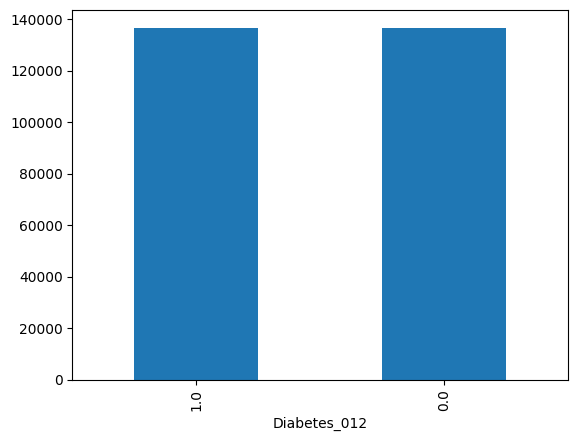

In [8]:
pd.Series(y_train).value_counts().plot(kind='bar')

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21],
 [Text(0, 0, 'Diabetes_012'),
  Text(1, 0, 'HighBP'),
  Text(2, 0, 'HighChol'),
  Text(3, 0, 'CholCheck'),
  Text(4, 0, 'BMI'),
  Text(5, 0, 'Smoker'),
  Text(6, 0, 'Stroke'),
  Text(7, 0, 'HeartDiseaseorAttack'),
  Text(8, 0, 'PhysActivity'),
  Text(9, 0, 'Fruits'),
  Text(10, 0, 'Veggies'),
  Text(11, 0, 'HvyAlcoholConsump'),
  Text(12, 0, 'AnyHealthcare'),
  Text(13, 0, 'NoDocbcCost'),
  Text(14, 0, 'GenHlth'),
  Text(15, 0, 'MentHlth'),
  Text(16, 0, 'PhysHlth'),
  Text(17, 0, 'DiffWalk'),
  Text(18, 0, 'Sex'),
  Text(19, 0, 'Age'),
  Text(20, 0, 'Education'),
  Text(21, 0, 'Income')])

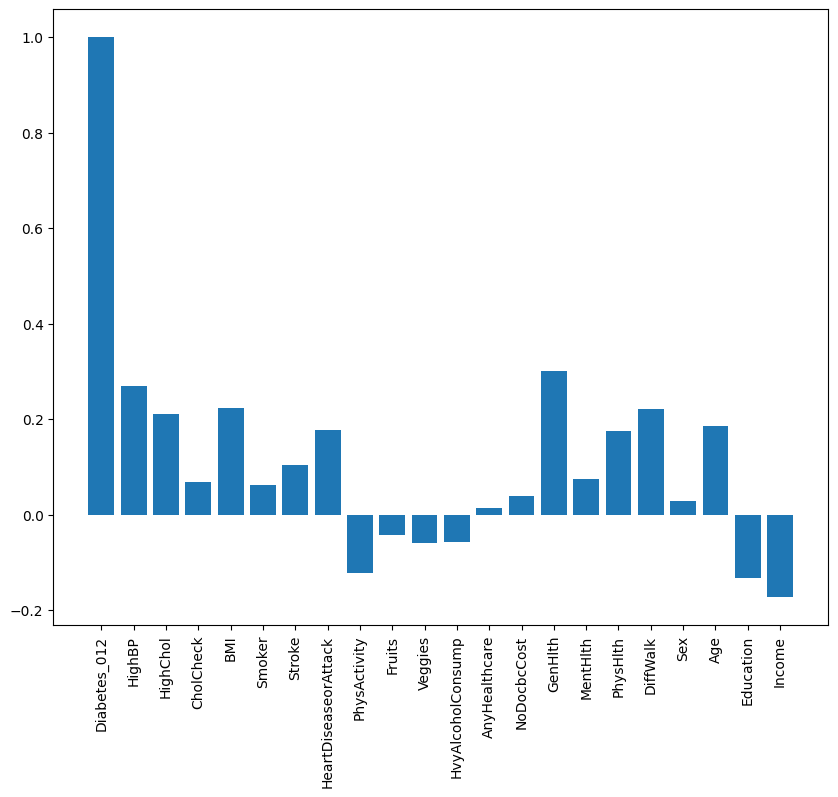

In [9]:
# Correlations

plt.figure(figsize=(10, 8))
df.corr("pearson")["Diabetes_012"]
fig2=plt.bar(df.corr("pearson")["Diabetes_012"].index, df.corr("pearson")["Diabetes_012"])
plt.xticks(rotation=90)


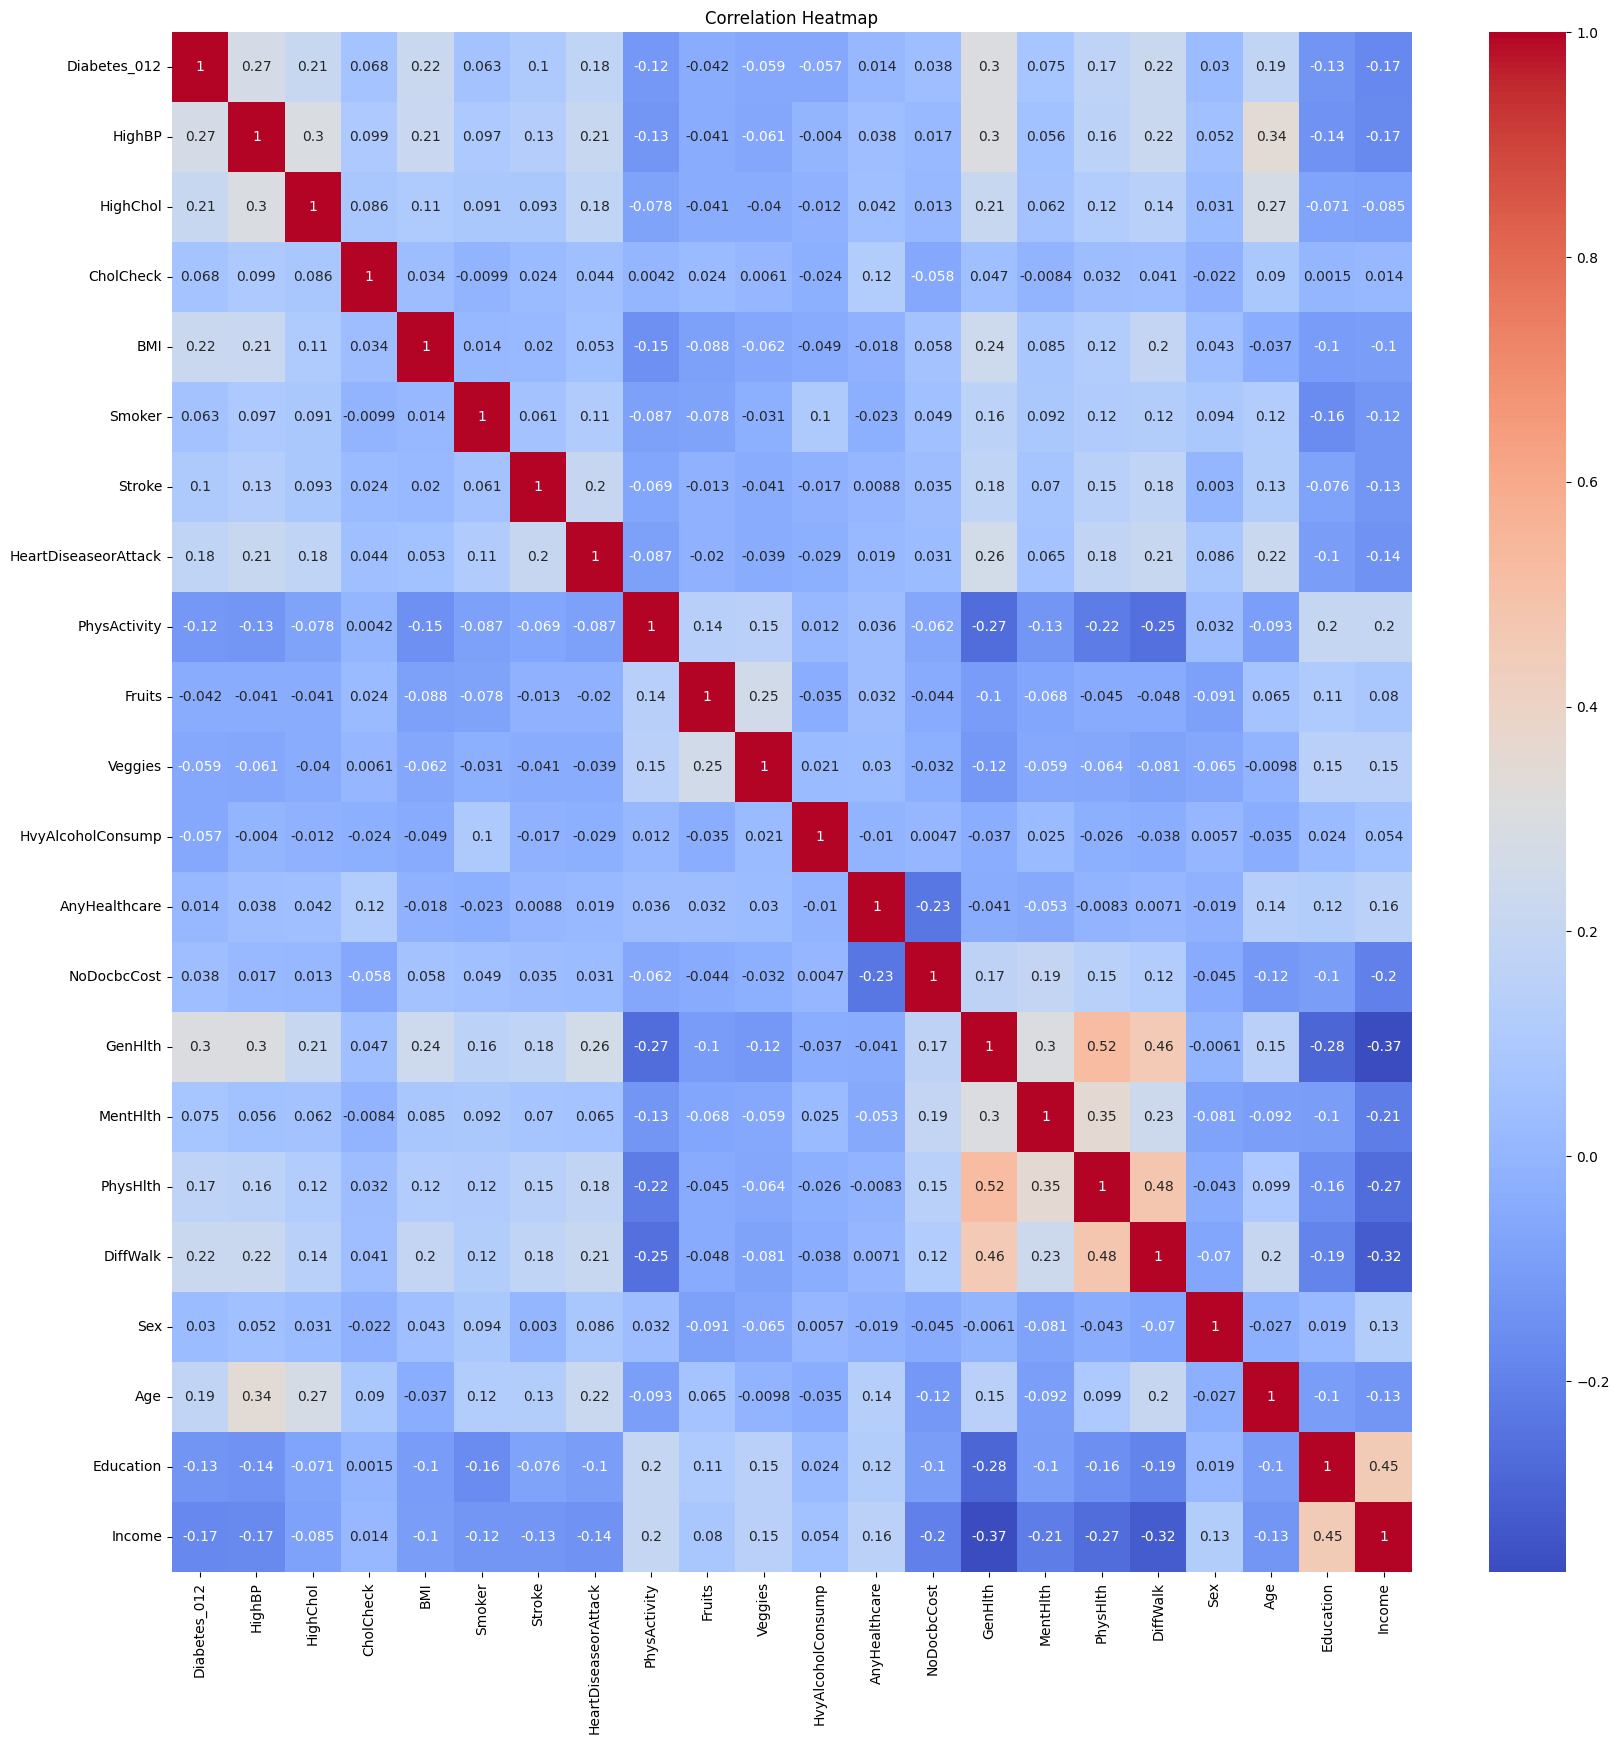

In [10]:
plt.figure(figsize=(20, 20))
sns.heatmap(
    df[df.columns].corr(),
    annot=True,
    cmap="coolwarm",
)
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
acc = []
for i in range(1, 30,2):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    y_pred_val = knn.predict(X_val)
    y_pred_val
    y_pred_test = knn.predict(X_test)
    y_pred_test
    print(
        f"Validation prediction F1 score for K={i}:",
        f1_score(y_val, y_pred_val)
    )
    print(
        f"Test prediction F1 score for K={i}:",
        f1_score(y_test, y_pred_test)
    )
    acc.append(f1_score(y_val, y_pred_val))
print(acc)

In [15]:
C = [0.01, 0.05, 0.1, 0.2, 0.5, 1, 5, 10, 15]
ACC = []
for c in C:
    logReg = LogisticRegression(
        C=c, multi_class="multinomial", solver="sag", random_state=0
    )
    logReg.fit(X_train, y_train)
    y_pred = logReg.predict(X_val)
    ACC.append(accuracy_score(y_val, y_pred))

ACC


[0.753597517237341,
 0.753597517237341,
 0.7536707118912035,
 0.753626795098886,
 0.7536121561681135,
 0.7536121561681135,
 0.753626795098886,
 0.753626795098886,
 0.753626795098886]

In [13]:
X = df.iloc[:, 1:]
X.columns
X.shape
y = df.iloc[:, 0]
y.value_counts()
# y[y==1.0]=2.0
# y.value_counts()

Diabetes_012
0.0    213703
1.0     39977
Name: count, dtype: int64